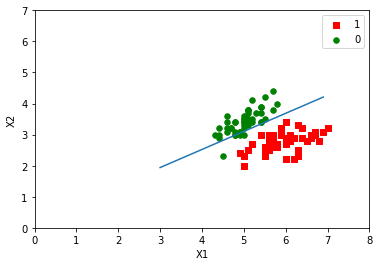

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def pickle(arr):

    li = []

    w, h  = arr.shape

    for i in range(w):

        for j in range(h):

            li.append(arr[i, j])

    return li


def standard(arr):
    '''
    数值标准化
    '''

    temp = (arr - arr.min())/(arr.max() - arr.min())

    return temp




def loadDataSet():

    from sklearn.datasets import load_iris

    iris = load_iris()

    data = iris.data

    label = iris.target

    return data[:100, [0,1, 2]], label[:100].reshape((-1, 1))


def sigmoid(inX):

    return 1.0/(1 + np.exp(-inX))


def predict(inMat, weights):
    
    inMatrix = np.mat(inMat)

    h = sigmoid(np.dot(inMatrix, weights))
    
    pre = np.where(h>=0.5, 1, 0)

    return h


def predict_(inMat, weights):

    inMatrix = np.mat(inMat)

    h = sigmoid((inMatrix*weights)/2500)

    pre = np.where(h>=0.5, 1, 0)

    return h


def gradientAscent(inMat, labelMat):

    inMatrix = np.mat(inMat)

    classLabels = np.mat(labelMat)

    m, n = inMatrix.shape

    alpha = 0.001

    iter_num = 1000

    loss = []

    weights = np.ones((n, 1))

    for i in range(iter_num):

        h = sigmoid(inMatrix * weights)

        error = classLabels - h

        loss.append(error)

        weights = weights + alpha*inMatrix.T*error

    return weights, loss



def stocGradientAscent(inMat, labelMat):

    '''
    
    随机梯度上升，当数据量比较大时，

    每次迭代都选择全量数据进行计算，

    计算量会非常大。

    所以采用每次迭代中一次,

    只选择其中的一行数据进行更新权重。

    '''

    inMatrix = np.mat(inMat)

    classLabels = np.mat(labelMat)

    m, n = inMatrix.shape

    alpha = 0.001

    iter_num = 1000

    loss = []

    weights = np.ones((n, 1))

    for k in range(iter_num):

        #  遍历计算每行

        for i in range(m):

            h = sigmoid(sum(inMatrix[i] * weights))

            error = classLabels[i] - h

            loss.append(error)

            weights = weights + alpha*inMatrix[i].T*error

    return weights, loss


def stocGradientAscent_1(inMat, labelMat):

    '''

    改进版随机梯度上升，

    在每次迭代中随机选择样本来更新权重，

    并且随迭代次数增加，权重变化越小。

    '''

    inMatrix = np.mat(inMat)

    classLabels = np.mat(labelMat)

    m, n = inMatrix.shape

    iter_num = 1000

    loss = []

    weights = np.ones((n, 1))

    for k in range(iter_num):

        dataIndex = [i for i in range(m)]

        for i in range(m):

            # 随迭代次数增加，权重变化越小

            alpha = 4 / (1+k+i) + 0.0001

            # 随机抽样

            randIndex = int(np.random.uniform(0, len(dataIndex)))

            h = sigmoid(sum(inMatrix[randIndex] * weights))

            error = classLabels[randIndex] - h

            loss.append(error)

            weights = weights + alpha*inMatrix[randIndex].T*error

            # 取出已经抽取的样本

            del dataIndex[randIndex]

        return weights, loss

    
def grad(inMat, labelMat):

    inMatrix = np.mat(inMat)   

    classLabels = np.mat(labelMat)

    m, n = inMatrix.shape

    weights = np.ones((n, 1))

    alpha = 0.001

    iter_num = 1000

    loss = []

    for i in range(iter_num):

        h = sigmoid((inMatrix*weights) / n)

        error = classLabels - h

        loss.append(error)

        weights = weights + alpha*inMatrix.T*error
    
    return weights, loss
    
    
def plotBestFit(weights):  #画出最终分类的图

    import matplotlib.pyplot as plt

    dataMat,labelMat=loadDataSet()

    dataArr = np.array(dataMat)

    n = np.shape(dataArr)[0]

    xcord1 = []; ycord1 = []

    xcord2 = []; ycord2 = []

    for i in range(n):

        if int(labelMat[i])== 1:

            xcord1.append(dataArr[i,0])

            ycord1.append(dataArr[i,1])

        else:

            xcord2.append(dataArr[i,0])

            ycord2.append(dataArr[i,1])

    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s', label='1')

    ax.scatter(xcord2, ycord2, s=30, c='green', label='0')

    x = np.arange(3.0, 7.0, 0.1)

    y = (-weights[0]-weights[1]*x)/weights[2]

    ax.plot(x, y)

    plt.xlabel('X1')

    plt.ylabel('X2')

    plt.xlim(0, 8)

    plt.ylim(0, 7)

    plt.legend()

    plt.show()


def main():
    
    global loss
    
    global weights

    dataMat, labelMat = loadDataSet()

    weights, loss=grad(dataMat[:-10], labelMat[:-10])
    plotBestFit(np.array(weights))


if __name__=='__main__':
    
    loss = []
    
    weights = []

    main()

In [2]:
weights

matrix([[-1.50144725],
        [-4.50730034],
        [ 7.74473004]])

In [3]:
loss[-1].mean()

-0.0030254000684693094

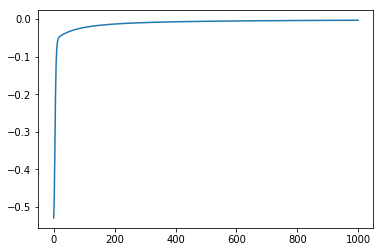

In [4]:
plt.plot([i.mean() for i in loss])

In [5]:
X, y = loadDataSet()

pre = predict(X[-10:], weights)

for i in zip(y[-10:], map(lambda x:x[0][0, 0],pre)):
    print(i)

(array([1]), 0.99999924750550906)
(array([1]), 0.99999761194496761)
(array([1]), 0.99997384764640895)
(array([1]), 0.99953988877649436)
(array([1]), 0.9999935411359534)
(array([1]), 0.99997098636969228)
(array([1]), 0.99998151339855379)
(array([1]), 0.99998194726349354)
(array([1]), 0.98672564801660623)
(array([1]), 0.99997444629983567)


# 图像识别

In [6]:
from PIL import Image

import numpy as np

import os

trainfold_0 = '/sdcard/1/img_test/0/'

trainfold_1= '/sdcard/1/img_test/1/'

trainfold = '/sdcard/1/img_test'

def img2arr(imgfile):

    im = Image.open(imgfile)

    im = im.resize((50, 50), Image.ANTIALIAS).convert('L')

    return np.array(im).astype('float')


def loadImage():
    
    X = []
    
    y = []
    
    for i in os.listdir(trainfold_0):
        
        arr_0 = os.path.join(trainfold_0, i)
        
        X.append(arr_0)
        
        y.append([0])
        
    for j in os.listdir(trainfold_1):
            
        arr_1 = os.path.join(trainfold_1, j)
            
        X.append(arr_1)
            
        y.append([1])
        
    return X, y


    

# 读取图像并转换为数组

In [7]:
X, y = loadImage()
xx = list(map(img2arr, X))
len(xx)

134

# 图片转矩阵并保存

In [8]:
np.save('X', xx)
np.save('y', y)

# 将转换成的数组保存本地

In [12]:
X=np.load('X.npy')
y = np.load('y.npy')

In [ ]:
X.shape

In [15]:
def fit(inMat, y, alpha=0.01, iter_num=9990):
    xx = [np.mat(i.reshape(1, -1)) for i in standard(X)]
    m = len(xx)
    n = xx[0].shape[1]
    w = np.ones((n, 1))
    loss = []
    for k in range(iter_num):
        for i in range(m):
            h = sigmoid(xx[i]*w/n)
            error = y[i] - h
            w = w+xx[i].T*error*alpha
        loss.append(error)
        if k%10==0:
            print(error)
    return w, loss
w, loss = fit(X, y)

[[ 0.35626337]]
[[ 0.45519221]]
[[ 0.47767288]]
[[ 0.47775537]]
[[ 0.4717682]]
[[ 0.46428755]]
[[ 0.45658908]]
[[ 0.44902378]]
[[ 0.44168295]]
[[ 0.43458483]]
[[ 0.42772702]]
[[ 0.42110137]]
[[ 0.41469828]]
[[ 0.40850791]]
[[ 0.40252062]]
[[ 0.39672711]]
[[ 0.39111844]]
[[ 0.38568609]]
[[ 0.38042193]]
[[ 0.37531827]]
[[ 0.37036778]]
[[ 0.36556356]]
[[ 0.36089905]]
[[ 0.35636807]]
[[ 0.35196476]]
[[ 0.34768361]]
[[ 0.34351939]]
[[ 0.33946716]]
[[ 0.33552227]]
[[ 0.3316803]]
[[ 0.32793708]]
[[ 0.32428867]]
[[ 0.32073134]]
[[ 0.31726153]]
[[ 0.3138759]]
[[ 0.31057126]]
[[ 0.3073446]]
[[ 0.30419305]]
[[ 0.30111388]]
[[ 0.2981045]]
[[ 0.29516245]]
[[ 0.29228538]]
[[ 0.28947105]]
[[ 0.28671734]]
[[ 0.28402221]]
[[ 0.28138372]]
[[ 0.27880002]]
[[ 0.27626934]]
[[ 0.27378998]]
[[ 0.27136033]]
[[ 0.26897884]]
[[ 0.26664402]]
[[ 0.26435446]]
[[ 0.26210878]]
[[ 0.25990568]]
[[ 0.2577439]]
[[ 0.25562225]]
[[ 0.25353956]]
[[ 0.25149472]]
[[ 0.24948666]]
[[ 0.24751435]]
[[ 0.2455768]]
[[ 0.24367307]]

[[ 0.05913277]]
[[ 0.05903864]]
[[ 0.05894483]]
[[ 0.05885134]]
[[ 0.05875817]]
[[ 0.05866532]]
[[ 0.05857278]]
[[ 0.05848056]]
[[ 0.05838865]]
[[ 0.05829705]]
[[ 0.05820576]]
[[ 0.05811478]]
[[ 0.05802411]]
[[ 0.05793374]]
[[ 0.05784367]]
[[ 0.05775391]]
[[ 0.05766444]]
[[ 0.05757528]]
[[ 0.05748641]]
[[ 0.05739784]]
[[ 0.05730957]]
[[ 0.05722159]]
[[ 0.0571339]]
[[ 0.0570465]]
[[ 0.05695939]]
[[ 0.05687257]]
[[ 0.05678604]]
[[ 0.05669979]]
[[ 0.05661382]]
[[ 0.05652814]]
[[ 0.05644274]]
[[ 0.05635762]]
[[ 0.05627278]]
[[ 0.05618821]]
[[ 0.05610392]]
[[ 0.05601991]]
[[ 0.05593617]]
[[ 0.0558527]]
[[ 0.0557695]]
[[ 0.05568657]]
[[ 0.05560391]]
[[ 0.05552152]]
[[ 0.05543939]]
[[ 0.05535753]]
[[ 0.05527593]]
[[ 0.0551946]]
[[ 0.05511352]]
[[ 0.05503271]]
[[ 0.05495215]]
[[ 0.05487185]]
[[ 0.05479181]]
[[ 0.05471202]]
[[ 0.05463248]]
[[ 0.0545532]]
[[ 0.05447417]]
[[ 0.0543954]]
[[ 0.05431687]]
[[ 0.05423858]]
[[ 0.05416055]]
[[ 0.05408276]]
[[ 0.05400522]]
[[ 0.05392792]]
[[ 0.05385086]]

In [ ]:
w

# 保存训练完的参数

In [18]:
np.save('/sdcard/1/csv/W', w)
np.savetxt('/sdcard/1/csv/W.txt', w)

In [19]:
loss[-1].shape

(1, 1)

In [38]:
xx = [standard(X)[i].reshape(1, -1) for i in range(len(X)) ]
xx[0]

array([[ 0.25490196,  0.25882353,  0.25882353, ...,  0.05882353,
         0.0627451 ,  0.0627451 ]])

# 损失函数可视化边界

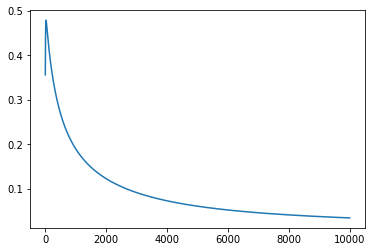

In [20]:
ll = [loss[i][0, 0] for i in range(len(loss))]
plt.plot(ll)

# 真实结果与预测结果对比

In [41]:

pre = [predict_(i, w)[0, 0] for i in xx]
for i in zip(y, pre):
    print(i)

(array([0]), 0.16878535077414766)
(array([0]), 0.12526055170359701)
(array([0]), 0.074270633632736144)
(array([0]), 0.12244422567369731)
(array([0]), 0.048868242882732116)
(array([0]), 0.099456388557036326)
(array([0]), 0.745049497830233)
(array([0]), 0.20498310752054913)
(array([0]), 0.19452280821145398)
(array([0]), 0.31406186322939733)
(array([0]), 0.21760672770474337)
(array([0]), 0.095958494272467401)
(array([0]), 0.21874003268652606)
(array([0]), 0.20074268604358528)
(array([0]), 0.10572522271573098)
(array([0]), 0.053601859056728214)
(array([0]), 0.032149853705724735)
(array([0]), 0.83724473635198127)
(array([0]), 0.086378033909964944)
(array([0]), 0.30135517948967649)
(array([0]), 0.053274827093916399)
(array([0]), 0.0064044850966236497)
(array([0]), 0.016792195656501491)
(array([0]), 0.037136021403151677)
(array([0]), 0.0094693653977480988)
(array([0]), 0.026328520458090972)
(array([0]), 0.27646327218440547)
(array([0]), 0.44218227148092487)
(array([0]), 0.15822422143981574)
(

In [84]:
import os, shutil
currentfold = '/sdcard/1/img_base'
targetfold = '/sdcard/1/img_target'
for i in os.listdir(trainfold):
    current_path = os.path.join(currentfold, i)     
    tt = img2arr(current_path)
    aa = standard(tt).reshape(1, -1)
    pre = predict_(aa, w)[0, 0]
    if pre<0.5:
        target_path = os.path.join(targetfold, '0/'+i)
        shutil.move(current_path, target_path)
    else:
        target_path = os.path.join(targetfold, '1/'+i)
        shutil.move(current_path, target_path)
    print(pre, i[-7:])
    

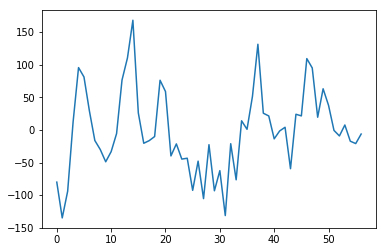

In [42]:
plt.plot([w[i][0, 0] for i in range(len(w)) if i%44==0  ])

In [44]:
w

matrix([[-80.05420238],
        [-75.09371666],
        [-65.22556818],
        ..., 
        [ 97.91490719],
        [ 89.23192369],
        [ 87.18955671]])

In [45]:
max(loss)

matrix([[ 0.47903797]])

In [ ]:
len(xx)